In [2]:
import numpy as np # Numpy(넘파이) 패키지 임포트
import pandas as pd #pandas(판다스) 패키지 임포트
import matplotlib.pyplot as plt #Matplotlib(맷플롯립) 패키지의 pyplot 모듈을 plt로 임포트
import seaborn as sns #Seaborn(씨본) 패키지 임포트
import matplotlib.pyplot as plt # 맷플롯립 import 하기

In [4]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.loc[df['BMI'] <= 10, 'BMI'] = np.nan
df = df.dropna(axis='index', how='any')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [43]:
df = df.reset_index(drop=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,10,115,0,0,0,35.3,0.134,29,0
4,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
460,9,170,74,31,0,44.0,0.403,43,1
461,10,101,76,48,180,32.9,0.171,63,0
462,2,122,70,27,0,36.8,0.340,27,0
463,1,126,60,0,0,30.1,0.349,47,1


In [52]:
# df.loc[df['BMI'] <= 10, 'BMI'] = np.nan
df_Ins0 = df.loc[df['Insulin'] == 0, 'Insulin'] = np.nan
df_Ins0 = df.dropna(axis='index', how='any')

In [27]:
df.shape

(757, 9)

In [20]:
df['Insulin'].mean()

155.7175572519084

### 피마 인디언 당뇨병 예측

### https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

- 당뇨병 여부를 판단.
- 피마 인디언 당뇨병 데이터 셋트는 북아메리카 피마 지역 원주민의  Type-2 당뇨병 결과 데이터. 

- 보통 당뇨 원인으로 식습관과 유전을 꼽습니다.

- 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만, 20세기 후반에 들어서면서 서구화된 식습관으로 당뇨 환자가 생김.

 - Pregnancies : 임신 횟수 -> Number of times pregnant
 - Glucose : 포도당 부하 검사 수치 -> Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 - bloodPressure:혈압(mm Hg) -> Diastolic blood pressure (mm Hg)
 - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm) ->Triceps skin fold thickness (mm)
 - Insulin : 2시간 혈청 인슐린(mu U/ml) ->2-Hour serum insulin (mu U/ml)
 - BMI : 체질량 지수( 체중(kg) / (키(m)^2)) -> Body mass index (weight in kg/(height in m)^2)
 - DiabetesPedigressFunction : 당뇨병 혈통 기능. ->Diabetes pedigree function
 - Age : 나이 ->age(years)
 - Outcome : class 결정 값 (0 또는 1) -> Class variable (0 or 1) 268 of 768 are 1, the others are 0

bmi를 3 단위로 나눠서 그 해당값의 평균 당이나 그런걸 구해서 막대그래프 그리기나 꺾은선 그래프 그리기

In [11]:
df['BMI'].max()

67.1

In [4]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False#상삼각행렬 False -> 하삼각행렬

<Axes: >

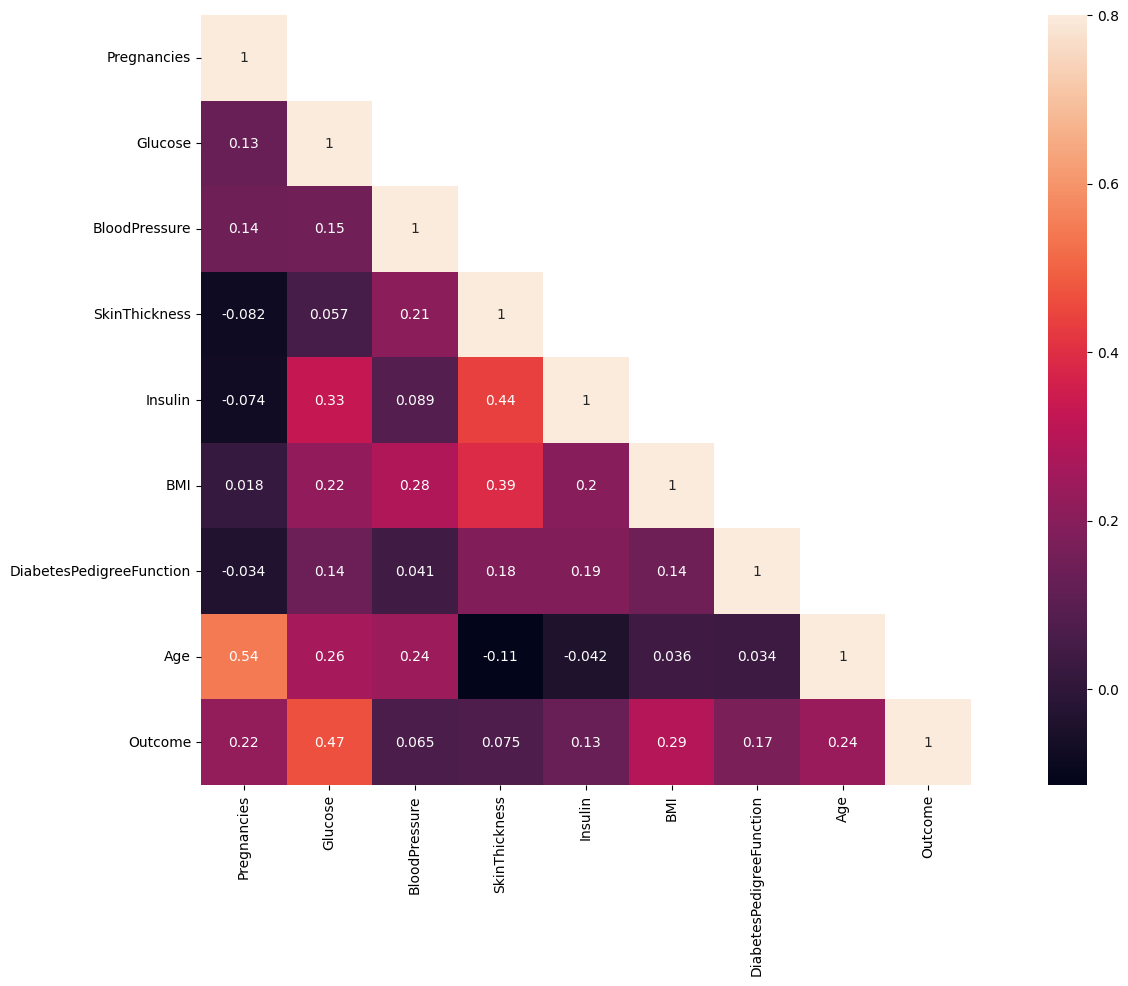

In [5]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False#상삼각행렬 False -> 하삼각행렬
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

팔 두깨와 bmi의 관계 알아보기

In [73]:
df_BMI_Skin = df[:][:]
df_BMI_Skin['BMI'] = df['BMI'] // 5 * 5
df_BMI_Skin['SkinThickness'] = df['SkinThickness'] // 3 * 3
i = 0
bmi_skin_avg = []
while i <= 65:
  bmi_skin_avg.append((df_BMI_Skin['BMI'] == i)['SkinThickness'].mean()) # 조건에 아직 평균을 안 냄.
  i += 5
print(bmi_skin_avg)
df_BMI_Skin

KeyError: 'SkinThickness'

In [ ]:
def corrplot2_1(a, b):
    for_list = [a, b]
    for j in for_dic[for_list[0]]:
        df_1_2 = df_1.loc[df[for_list[0]] == j]
        for k in for_dic[for_list[1]]:
            df_1_2_3 = df_1_2.loc[df[for_list[1]] == k]
            corrMatt = df_1_2_3.drop([for_list[0], for_list[1]], axis = 1).corr()
            mask = np.array(corrMatt)
            mask[np.tril_indices_from(mask)]=False
            fig,ax = plt.subplots()
            fig.set_size_inches(20,10)
            plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}')
            sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
            plt.savefig(f'homework_img/1-{for_list[0]}-{j}-{for_list[1]}-{k}.png', dpi=100)

<Axes: xlabel='BloodPressure', ylabel='Outcome'>

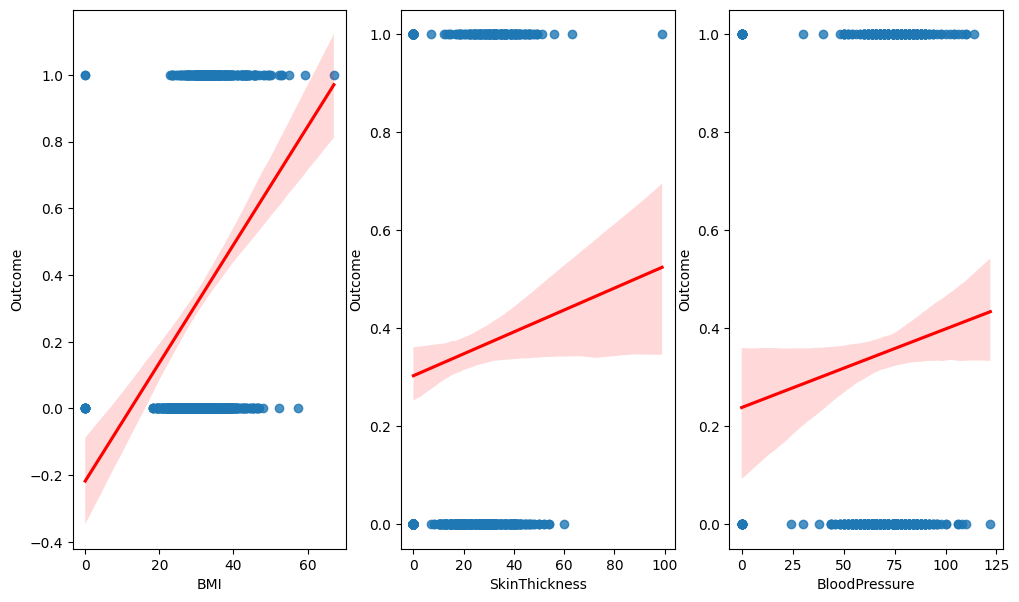

In [ ]:
fig, (ax1,ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,7)
sns.regplot(x='BMI',y='Outcome',data = df,ax=ax1, line_kws={"color": "red"})
sns.regplot(x='SkinThickness',y='Outcome',data = df,ax=ax2, line_kws={"color": "red"})
sns.regplot(x='BloodPressure',y='Outcome',data = df,ax=ax3, line_kws={"color": "red"})

막대그래프를 통해 제대로 확인하기

In [92]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [62]:
df_1 = df[:][:]
df_2 = df[:][:]

In [63]:
df_1.loc[df_1['BMI'] <= 10, 'BMI'] = np.nan
df_1.loc[df_1['Glucose'] == 0, 'Glucose'] = np.nan
df_1 = df_1.dropna(axis='index', how='any')
df_1 = df_1.reset_index(drop=True)
df_2.loc[df_2['BMI'] <= 10, 'BMI'] = np.nan
df_2.loc[df_2['Insulin'] == 0, 'Insulin'] = np.nan
df_2 = df_2.dropna(axis='index', how='any')
df_2 = df_2.reset_index(drop=True)

In [69]:
df_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66,23,94.0,28.1,0.167,21,0
1,0,137.0,40,35,168.0,43.1,2.288,33,1
2,3,78.0,50,32,88.0,31.0,0.248,26,1
3,2,197.0,70,45,543.0,30.5,0.158,53,1
4,1,189.0,60,23,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
387,0,181.0,88,44,510.0,43.3,0.222,26,1
388,1,128.0,88,39,110.0,36.5,1.057,37,1
389,2,88.0,58,26,16.0,28.4,0.766,22,0
390,10,101.0,76,48,180.0,32.9,0.171,63,0


In [108]:
df0 = df.loc[df['Outcome'] == 0]
df1 = df.loc[df['Outcome'] == 1]

In [135]:
df0 = df.loc[df['Outcome'] == 0]
df1 = df.loc[df['Outcome'] == 1]
df0 = df0.loc[df0['SkinThickness'] != 0]
df1 = df1.loc[df1['SkinThickness'] != 0]
print('당뇨병 아닌 사람 평균피부두께:', round(df0['SkinThickness'].mean(), 2))
print('당뇨병인 사람 평균피부두께:', round(df1['SkinThickness'].mean(), 2))

당뇨병 아닌 사람 평균피부두께: 27.24
당뇨병인 사람 평균피부두께: 33.0


In [121]:
print('당뇨병 아닌 사람 평균혈압:', round(df0['BloodPressure'].mean(), 2))
print('당뇨병인 사람 평균혈압:', round(df1['BloodPressure'].mean(), 2))

당뇨병 아닌 사람 평균혈압: 70.88
당뇨병인 사람 평균혈압: 75.32


<Axes: xlabel='BMI', ylabel='Insulin'>

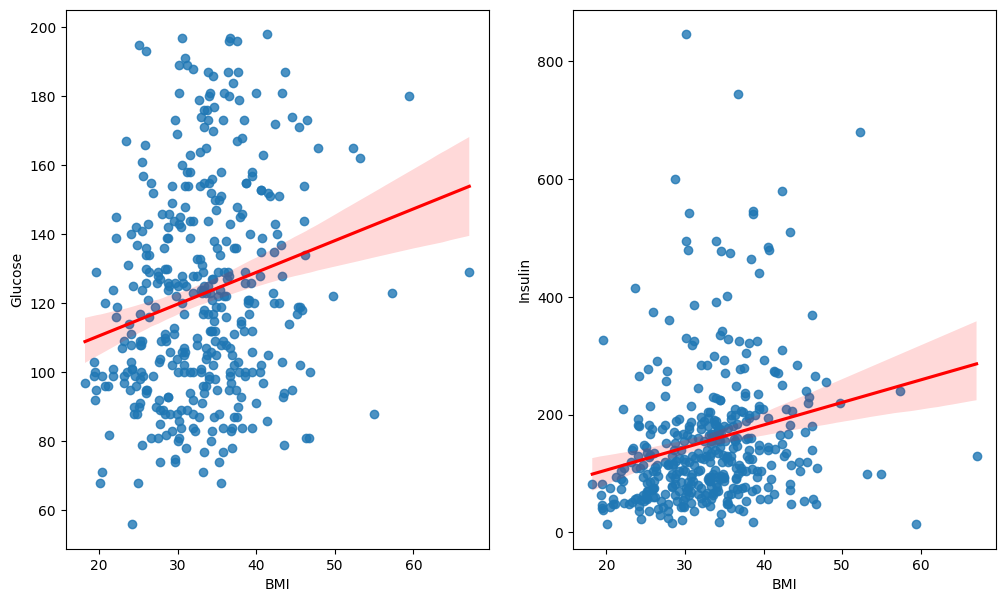

In [65]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,7)
sns.regplot(x='BMI',y='Glucose',data = df_1,ax=ax1, line_kws={"color": "red"})
sns.regplot(x='BMI',y='Insulin',data = df_2,ax=ax2, line_kws={"color": "red"})

In [85]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,NaN,33.6,0.627,50,1
1,1,85.0,66,29,NaN,26.6,0.351,31,0
2,8,183.0,64,0,NaN,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63,0
764,2,122.0,70,27,NaN,36.8,0.340,27,0
765,5,121.0,72,23,112.0,26.2,0.245,30,0
766,1,126.0,60,0,NaN,30.1,0.349,47,1


In [86]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [133]:
df_3 = df0.loc[(df0['Glucose'] != 0) & (df0['Insulin'] != 0)  & (df0['SkinThickness'] != 0) & (df0['BloodPressure'] != 0) & (df0['BMI'] != 0) & (df0['DiabetesPedigreeFunction'] != 0)]
df_3 = df_3.reset_index(drop=True)
df_3.drop(['Outcome'], axis=1, inplace=True)
df_3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89,66,23,94,28.1,0.167,21
1,1,103,30,38,83,43.3,0.183,33
2,3,126,88,41,235,39.3,0.704,27
3,1,97,66,15,140,23.2,0.487,22
4,13,145,82,19,110,22.2,0.245,57
...,...,...,...,...,...,...,...,...
257,1,81,74,41,57,46.3,1.096,32
258,1,121,78,39,74,39.0,0.261,28
259,2,88,58,26,16,28.4,0.766,22
260,10,101,76,48,180,32.9,0.171,63


<Axes: >

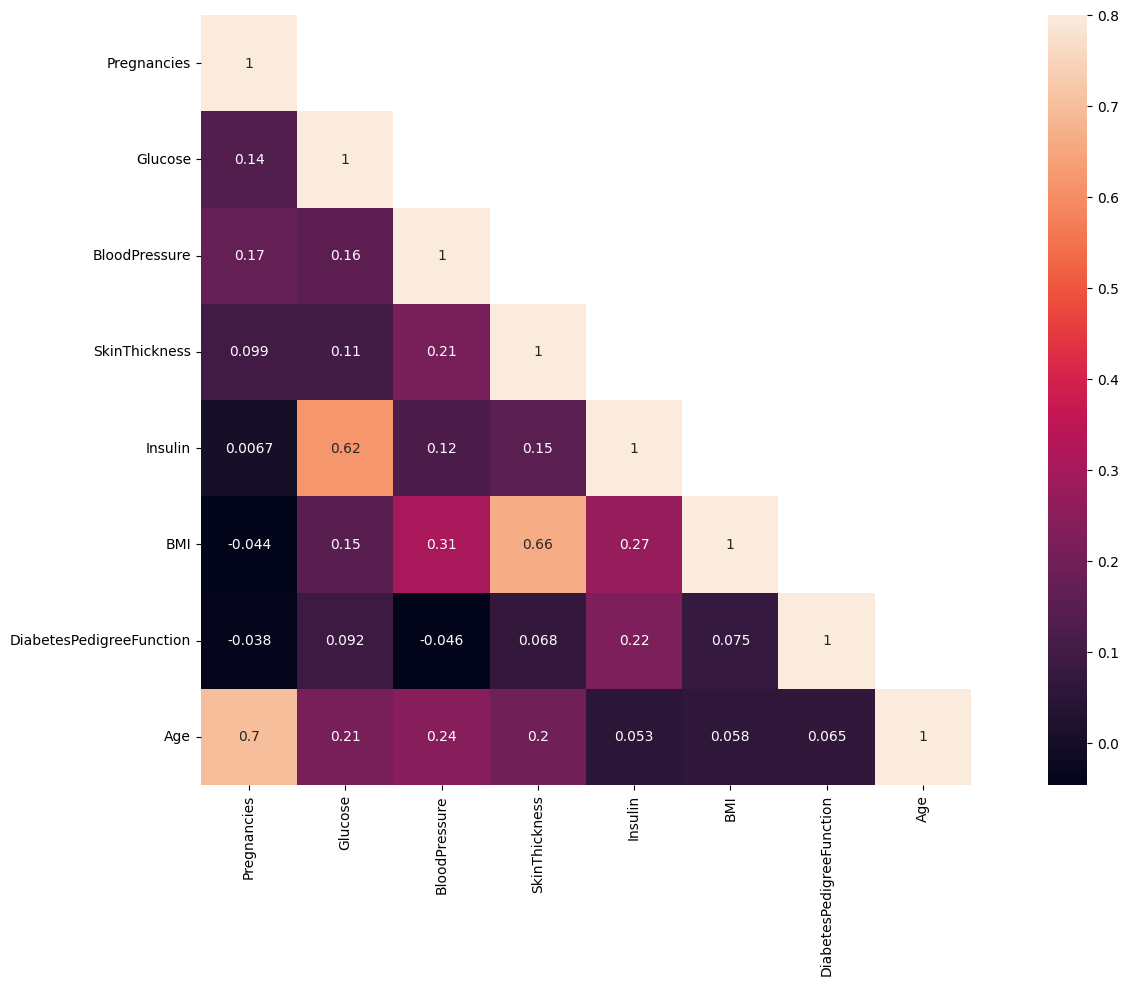

In [134]:
corrMatt = df_3.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False#상삼각행렬 False -> 하삼각행렬
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

# 당뇨병 유형
당뇨병은 크게 제 1형 당뇨병과 제 2형 당뇨병으로 구분되는데, 1형 당뇨병은 인슐린의 분비가 부족해서 발생하고, 2형 당뇨병은 말초 기관의 인슐린 저항성으로 인해 발생합니다.  
출처: 대한소아청소년과학회  
https://www.pediatrics.or.kr/bbs/index.html?code=disease_info&category=B&gubun=&page=1&number=8943&mode=view&keyfield=&key=

지금까지의 자료로는 확신할 순 없지만  
당뇨2형으로 추측.

In [144]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [148]:
df.loc[(df['Outcome'] == 0) & (df['BMI'] == 0), 'BMI'] = 30.9
df.loc[(df['Outcome'] == 1) & (df['BMI'] == 0), 'BMI'] = 35.4
df.loc[(df['Outcome'] == 0) & (df['Insulin'] == 0), 'Insulin'] = 130.3
df.loc[(df['Outcome'] == 1) & (df['Insulin'] == 0), 'Insulin'] = 206.9
df.loc[(df['Outcome'] == 0) & (df['SkinThickness'] == 0), 'SkinThickness'] = 27.2
df.loc[(df['Outcome'] == 1) & (df['SkinThickness'] == 0), 'SkinThickness'] = 33
df.loc[(df['Outcome'] == 0) & (df['BloodPressure'] == 0), 'BloodPressure'] = 70.9
df.loc[(df['Outcome'] == 1) & (df['BloodPressure'] == 0), 'BloodPressure'] = 75.3
df.loc[(df['Outcome'] == 0) & (df['Glucose'] == 0), 'Glucose'] = 110
df.loc[(df['Outcome'] == 1) & (df['Glucose'] == 0), 'Glucose'] = 141.3
df.loc[(df['Outcome'] == 0) & (df['DiabetesPedigreeFunction'] == 0), 'DiabetesPedigreeFunction'] = 0.43
df.loc[(df['Outcome'] == 1) & (df['DiabetesPedigreeFunction'] == 0), 'DiabetesPedigreeFunction'] = 0.55
df
df.to_csv('diabetes2.csv', encoding='utf-8-sig')

<Axes: >

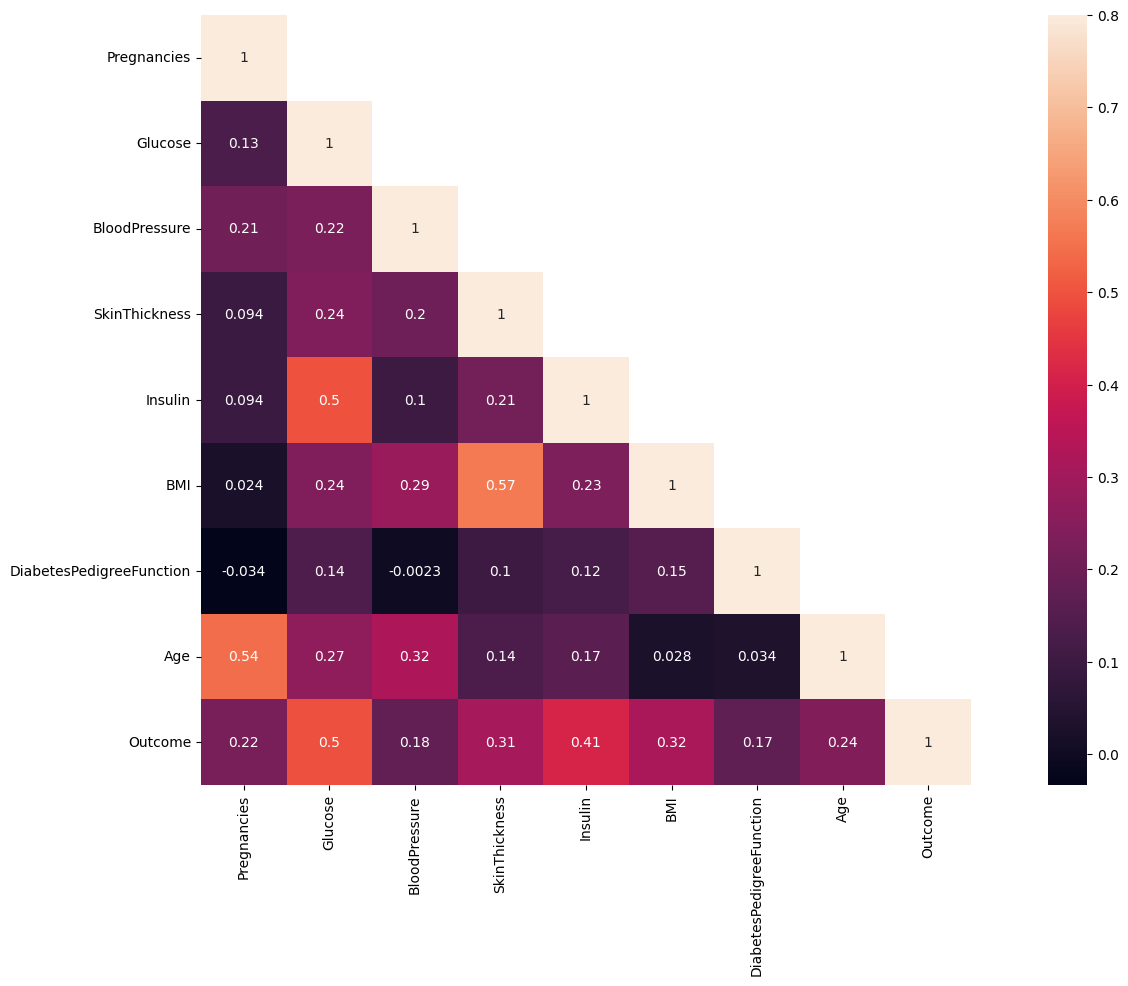

In [149]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False#상삼각행렬 False -> 하삼각행렬
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

<Axes: xlabel='BMI', ylabel='Insulin'>

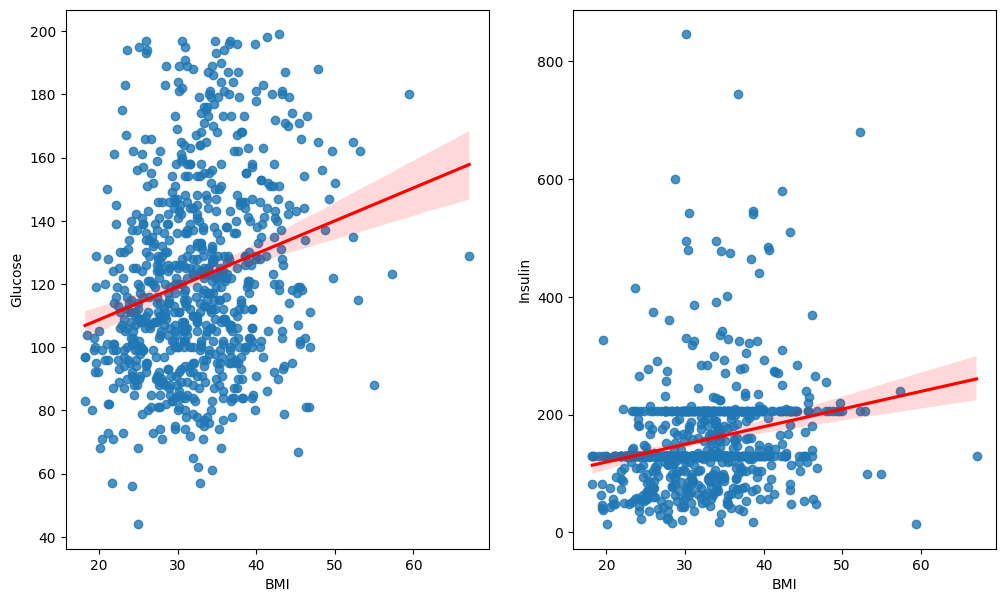

In [150]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,7)
sns.regplot(x='BMI',y='Glucose',data = df,ax=ax1, line_kws={"color": "red"})
sns.regplot(x='BMI',y='Insulin',data = df,ax=ax2, line_kws={"color": "red"})

In [159]:
import numpy as np # Numpy(넘파이) 패키지 임포트
import pandas as pd #pandas(판다스) 패키지 임포트
import seaborn as sns #Seaborn(씨본) 패키지 임포트
import matplotlib.pyplot as plt # 맷플롯립 import 하기
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [160]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [171]:
df0 = df.loc[df['Outcome'] == 0]
df1 = df.loc[df['Outcome'] == 1]
df0 = df0.loc[df0['BMI'] != 0]
df1 = df1.loc[df1['BMI'] != 0]
df0['BMI'] = df0['BMI'] // 3 * 3
df1['BMI'] = df1['BMI'] // 3 * 3

In [162]:
df['BMI'].max()

67.1

In [189]:
df1['Pregnancies'].value_counts()

Pregnancies
0     38
1     29
3     27
7     25
4     23
5     21
8     21
2     19
9     18
6     16
10     9
11     7
13     5
12     4
14     2
15     1
17     1
Name: count, dtype: int64

In [172]:
df0.drop(['Outcome'], axis=1, inplace=True)
df1.drop(['Outcome'], axis=1, inplace=True)

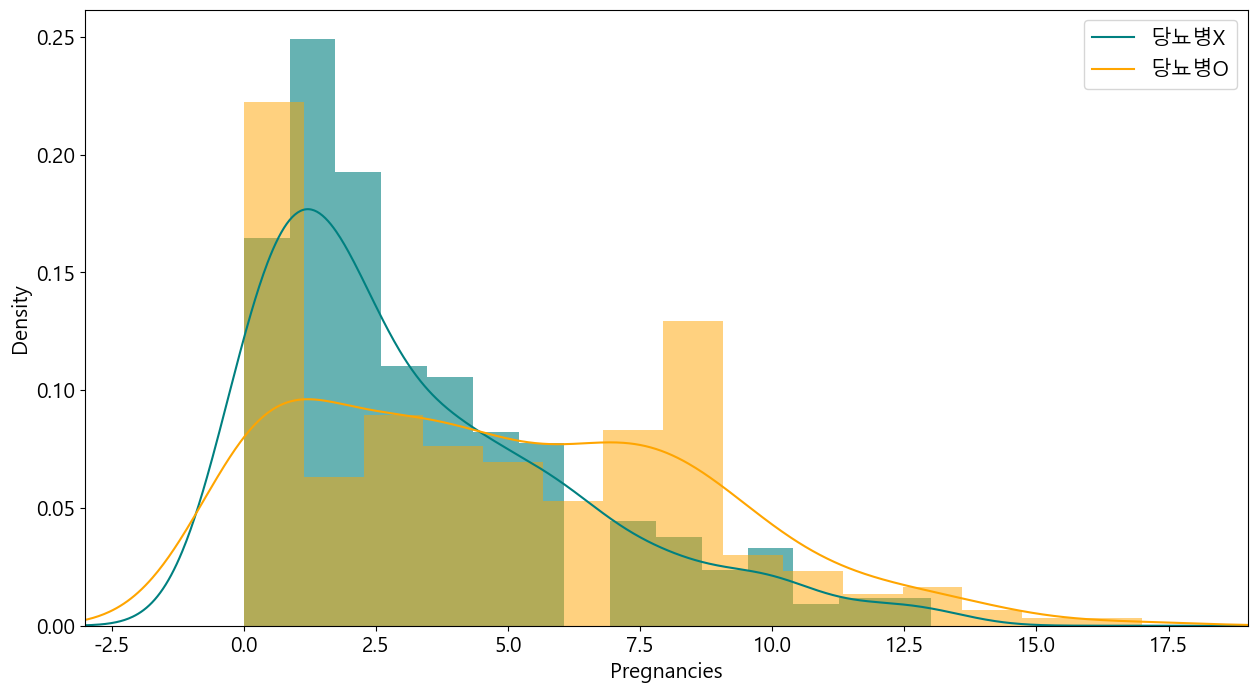

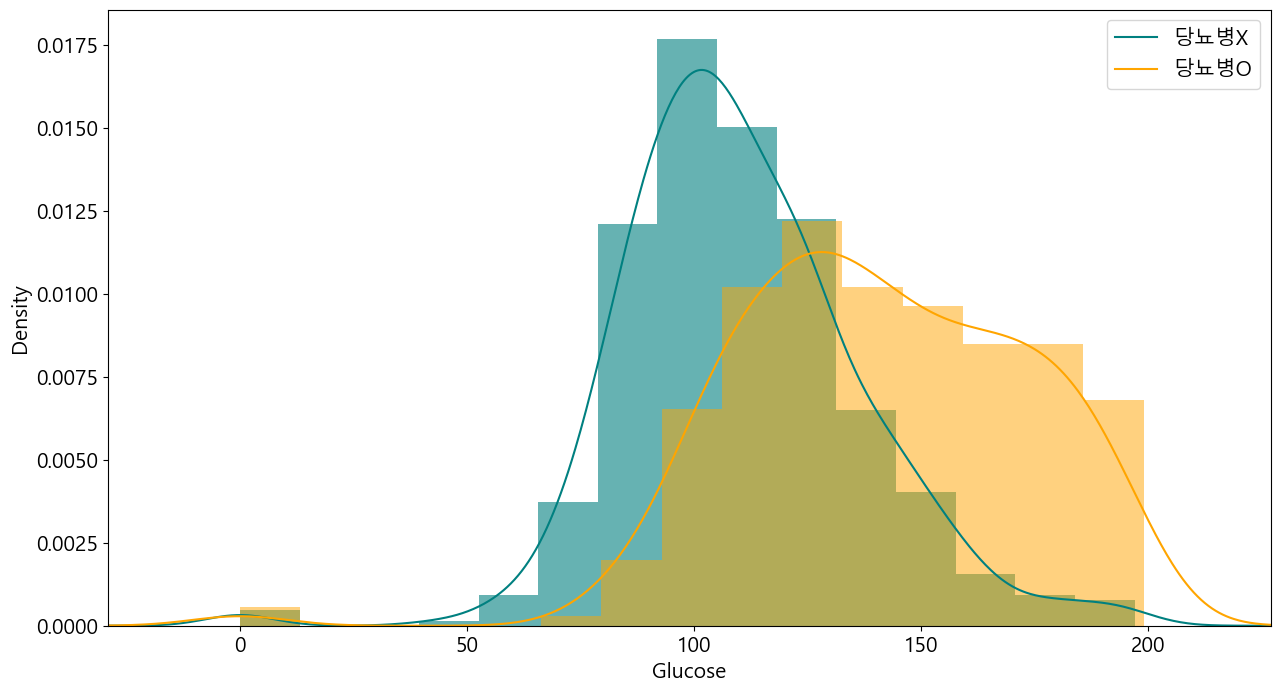

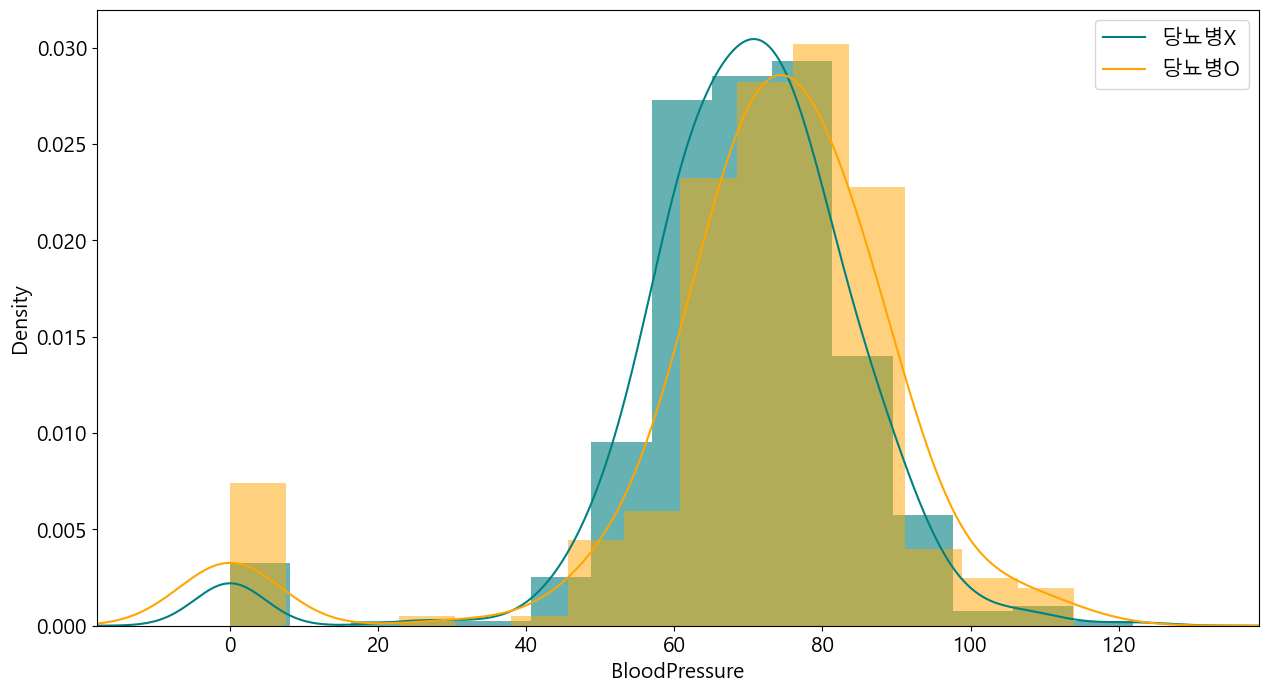

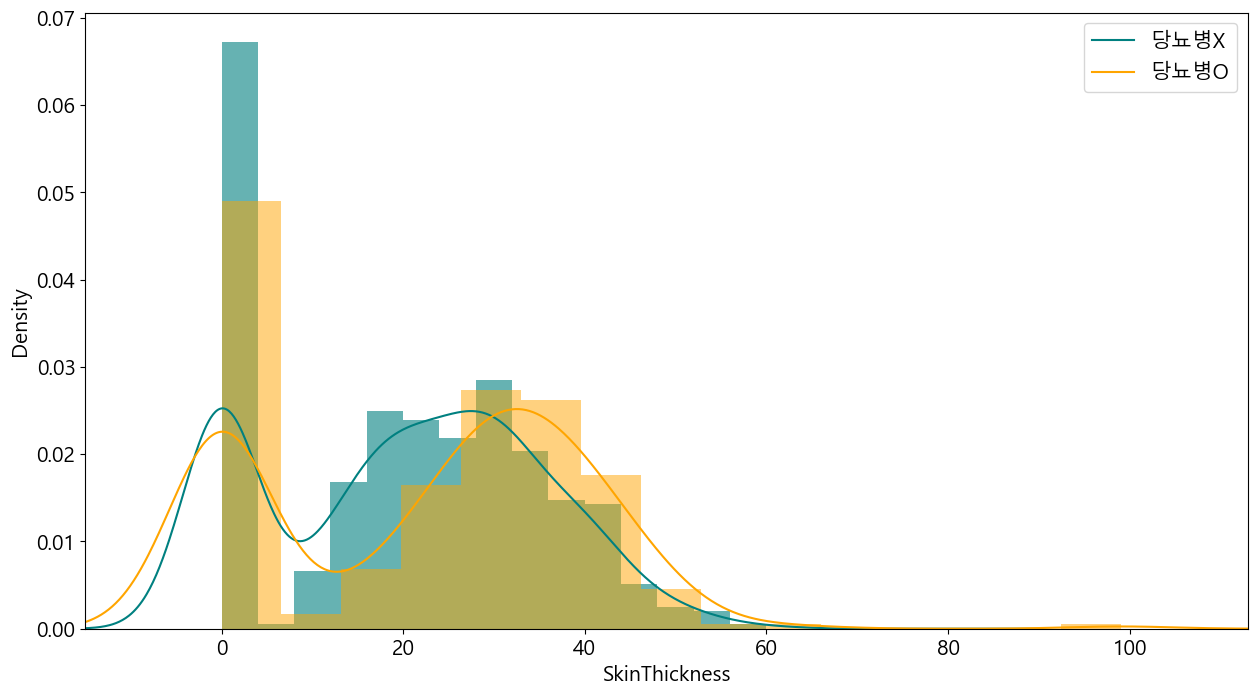

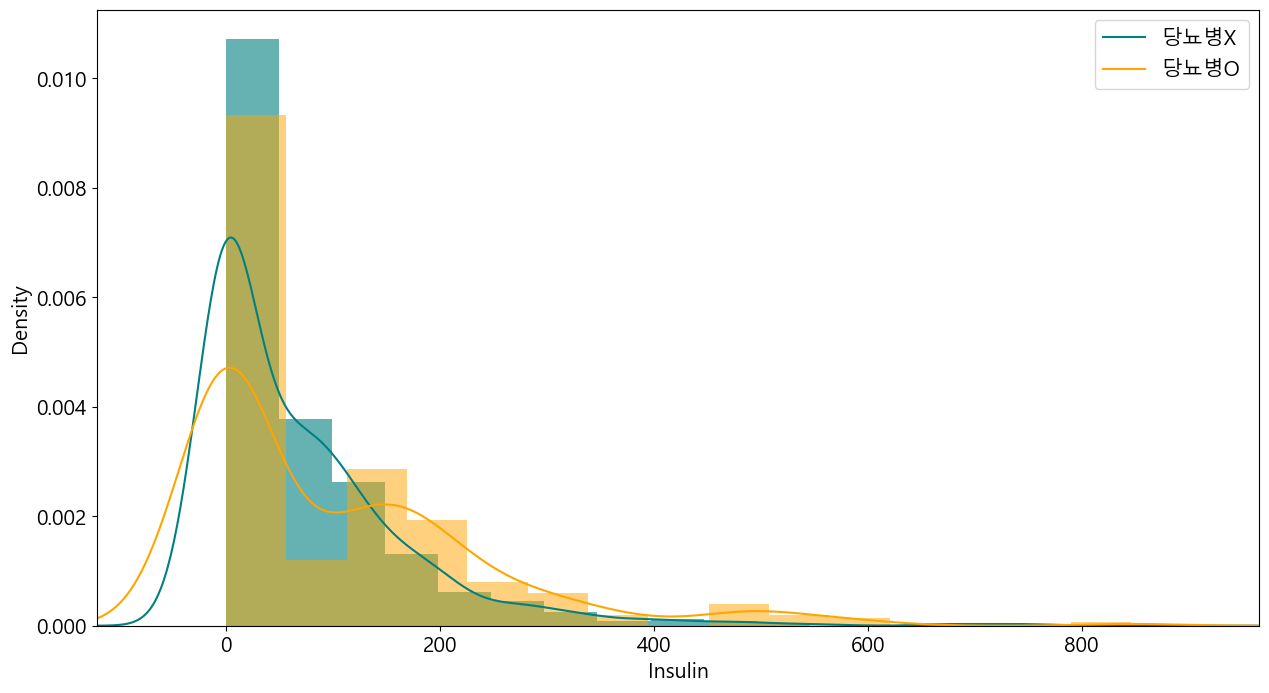

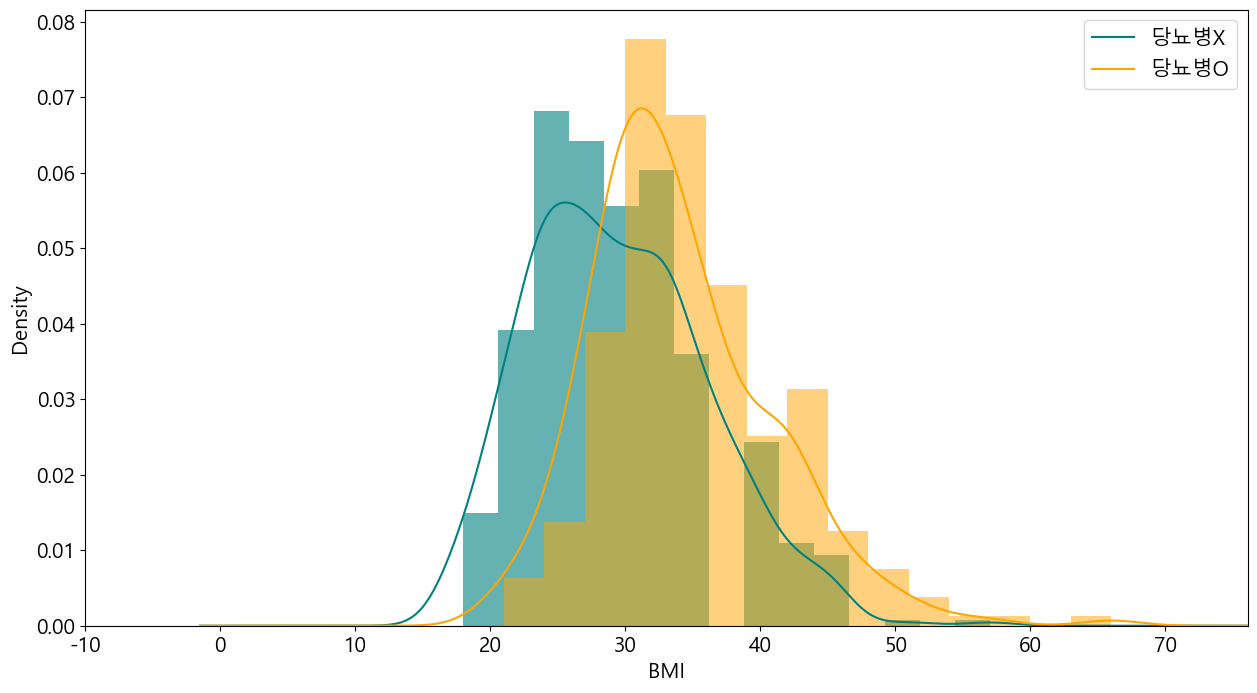

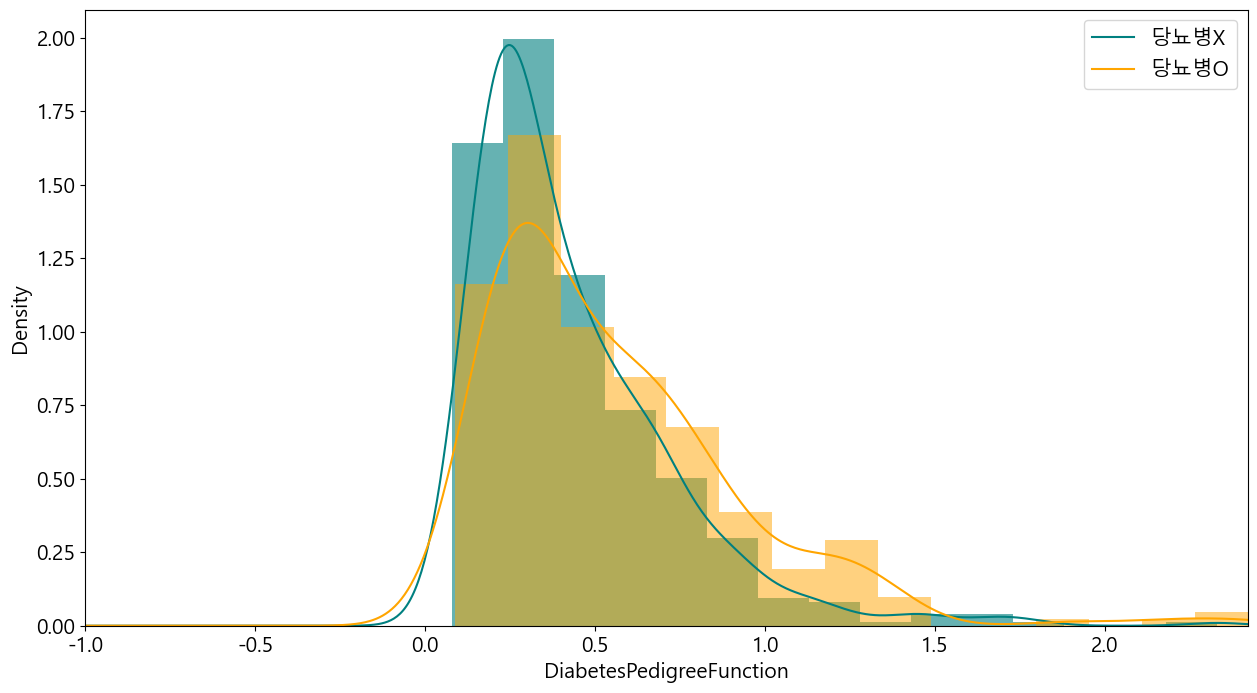

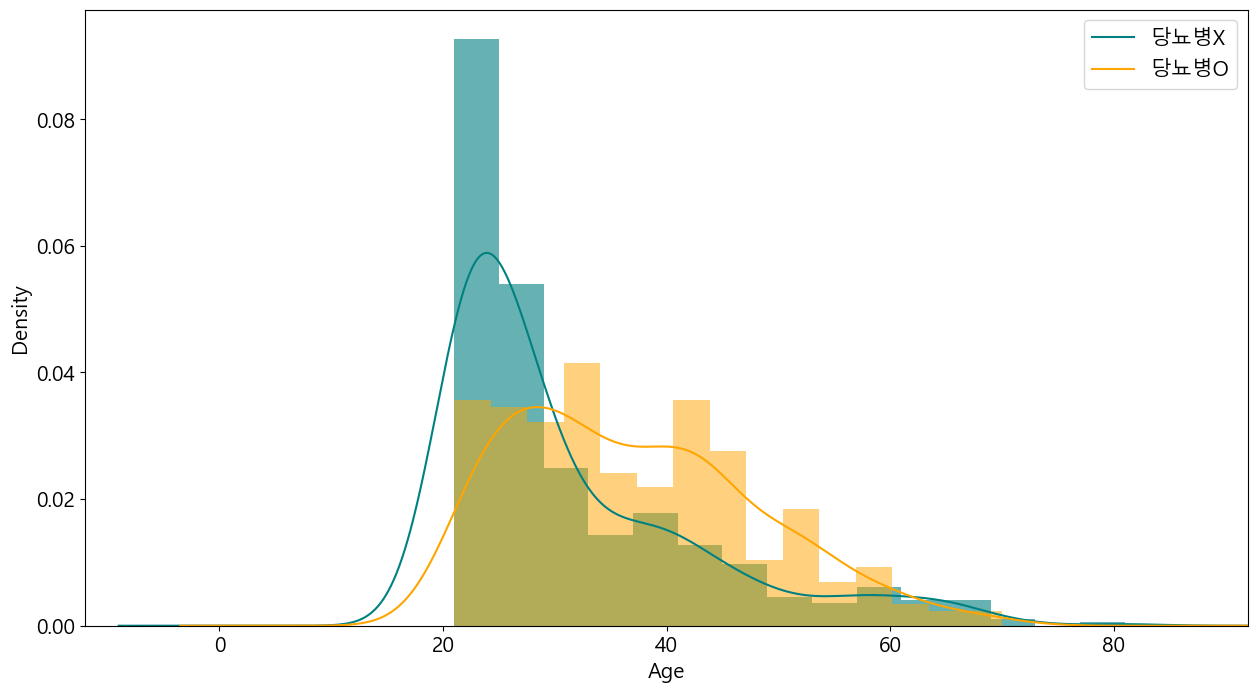

KeyError: 'Outcome'

<Figure size 1500x800 with 0 Axes>

In [173]:
for i in df.columns:
    plt.figure(figsize=(15,8))
    ax = df0[f'{i}'].hist(bins=15, density=True, stacked=True, color='teal',alpha=0.6)
    df0[f'{i}'].plot(kind = 'density',color='teal')
    ax = df1[f'{i}'].hist(bins=15, density=True, stacked=True, color='orange',alpha=0.5)
    df1[f'{i}'].plot(kind = 'density',color='orange')
    ax.legend(['당뇨병X','당뇨병O'])
    ax.set(xlabel=f'{i}')
    plt.xlim(-df[i].max() // 7,df[i].max() + df[i].max() // 7)
    plt.savefig(f'homework2_img/{i}.png', dpi=100)
    plt.show()